# Symptom Classification

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns

In [3]:
# Importing the dataset
df = pd.read_csv('data.csv')

C:\Users\sneha\AppData\Local\Temp\ipykernel_7320\2990719888.py:2: DtypeWarning: Columns (8,13,24) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data.csv')


## Preprocessing

In [4]:
# Remove unnecessary columns
df = df.drop(["Unnamed: 0","RECVDATE","CAGE_YR","CAGE_MO","RPT_DATE","SYMPTOM_TEXT","DATEDIED","ER_VISIT","HOSPDAYS","X_STAY","VAX_DATE","ONSET_DATE","LAB_DATA","V_FUNDBY","PRIOR_VAX","SPLTTYPE","FORM_VERS","TODAYS_DATE","BIRTH_DEFECT","VAX_LOT","VAX_DOSE_SERIES","VAX_SITE","STATE",'SYMPTOMVERSION1','SYMPTOMVERSION2','SYMPTOMVERSION3','SYMPTOMVERSION4','SYMPTOMVERSION5'], axis=1)
df.shape

(49021, 25)

In [5]:
# Checking for missing values
df.isnull().sum()

VAERS_ID           0
AGE_YRS         3760
SEX                0
DIED           45956
L_THREAT       46207
HOSPITAL       39901
DISABLE        47278
RECOVD          3583
NUMDAYS         3789
V_ADMINBY          0
OTHER_MEDS     17724
CUR_ILL        24162
HISTORY        14713
OFC_VISIT      40295
ER_ED_VISIT    38683
ALLERGIES      20299
SYMPTOM1           0
SYMPTOM2        8901
SYMPTOM3       16822
SYMPTOM4       24005
SYMPTOM5       29975
VAX_TYPE           0
VAX_MANU           0
VAX_ROUTE      11278
VAX_NAME           0
dtype: int64

In [6]:
# Replace missing values in DIED column with "N"
l=['DIED', 'L_THREAT', 'HOSPITAL', 'DISABLE', 'OFC_VISIT','ER_ED_VISIT']
for i in l:
    df[i].fillna('N', inplace=True)

l=['SYMPTOM2', 'SYMPTOM3', 'SYMPTOM4', 'SYMPTOM5',"VAX_ROUTE"]
for i in l:
    df[i].fillna("None", inplace=True)

df['RECOVD'].fillna('U', inplace=True)

l2 = ["ALLERGIES", "OTHER_MEDS", "CUR_ILL", "HISTORY"]
for i in l2:
    df[i].fillna("None", inplace=True)
    df[i] = df[i].replace("Na", "None")

# Replace missing values in AGE_YRS and NUMDAYS column with mean
df['AGE_YRS'].fillna(df['AGE_YRS'].mean(), inplace=True)
df['NUMDAYS'].fillna(df['NUMDAYS'].mean(), inplace=True)

In [7]:
# Progress Check
df.isnull().sum()

VAERS_ID       0
AGE_YRS        0
SEX            0
DIED           0
L_THREAT       0
HOSPITAL       0
DISABLE        0
RECOVD         0
NUMDAYS        0
V_ADMINBY      0
OTHER_MEDS     0
CUR_ILL        0
HISTORY        0
OFC_VISIT      0
ER_ED_VISIT    0
ALLERGIES      0
SYMPTOM1       0
SYMPTOM2       0
SYMPTOM3       0
SYMPTOM4       0
SYMPTOM5       0
VAX_TYPE       0
VAX_MANU       0
VAX_ROUTE      0
VAX_NAME       0
dtype: int64

#### We label encode "ALLERGIES", "OTHER_MEDS", "CUR_ILL", "HISTORY" columns to test the model

In [17]:
# Experimental block
le = LabelEncoder()

categoricalData = ['SEX', 'DIED', 'L_THREAT', 'HOSPITAL', 'DISABLE', 'RECOVD', 'V_ADMINBY', 'OTHER_MEDS', 'OFC_VISIT', 'ER_ED_VISIT', 'SYMPTOM1', 'SYMPTOM2', 'SYMPTOM3', 'SYMPTOM4', 'SYMPTOM5', 'VAX_TYPE', 'VAX_MANU', 'VAX_ROUTE', 'VAX_NAME', "ALLERGIES", "OTHER_MEDS", "CUR_ILL", "HISTORY"]
for i in categoricalData:
    df[i] = le.fit_transform(df[i])

In [18]:
accuracy_list=[]
accuracy_list_dt=[]

# Model Implementation: Random Forest Classifier


## 5th FOLD

In [19]:
# Splitting the dataset into the Training set and Test set
X = df.drop('VAX_TYPE', axis=1)
y = df['VAX_TYPE']

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size = 0.2, random_state = 0)

# print(X_train1.isnull().sum())

# Fitting Random Forest Classification to the Training set
classifier1 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier1.fit(X_train1, y_train1)

# Predicting the Test set results
y_pred1 = classifier1.predict(X_test1)

# Print Accuracy Score
acc= round(accuracy_score(y_test1, y_pred1)*100, 3)
accuracy_list.append(acc)
print("Accuracy: ",acc, "%")

# Print classification report
print(classification_report(y_test1, y_pred1))


Accuracy:  99.735 %
              precision    recall  f1-score   support

           2       1.00      1.00      1.00      9681
           4       0.00      0.00      0.00         1
           5       1.00      1.00      1.00         1
           8       1.00      0.50      0.67         2
           9       0.50      0.79      0.61        14
          10       1.00      1.00      1.00         2
          11       0.33      1.00      0.50         1
          14       1.00      1.00      1.00         1
          15       0.00      0.00      0.00         1
          16       0.86      0.92      0.89        13
          17       0.75      0.50      0.60         6
          18       0.00      0.00      0.00         2
          19       1.00      1.00      1.00         2
          20       1.00      1.00      1.00         1
          21       0.00      0.00      0.00         6
          23       0.00      0.00      0.00         0
          25       1.00      1.00      1.00         1
       

c:\Users\sneha\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\sneha\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\sneha\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

Accuracy:  99.918 %


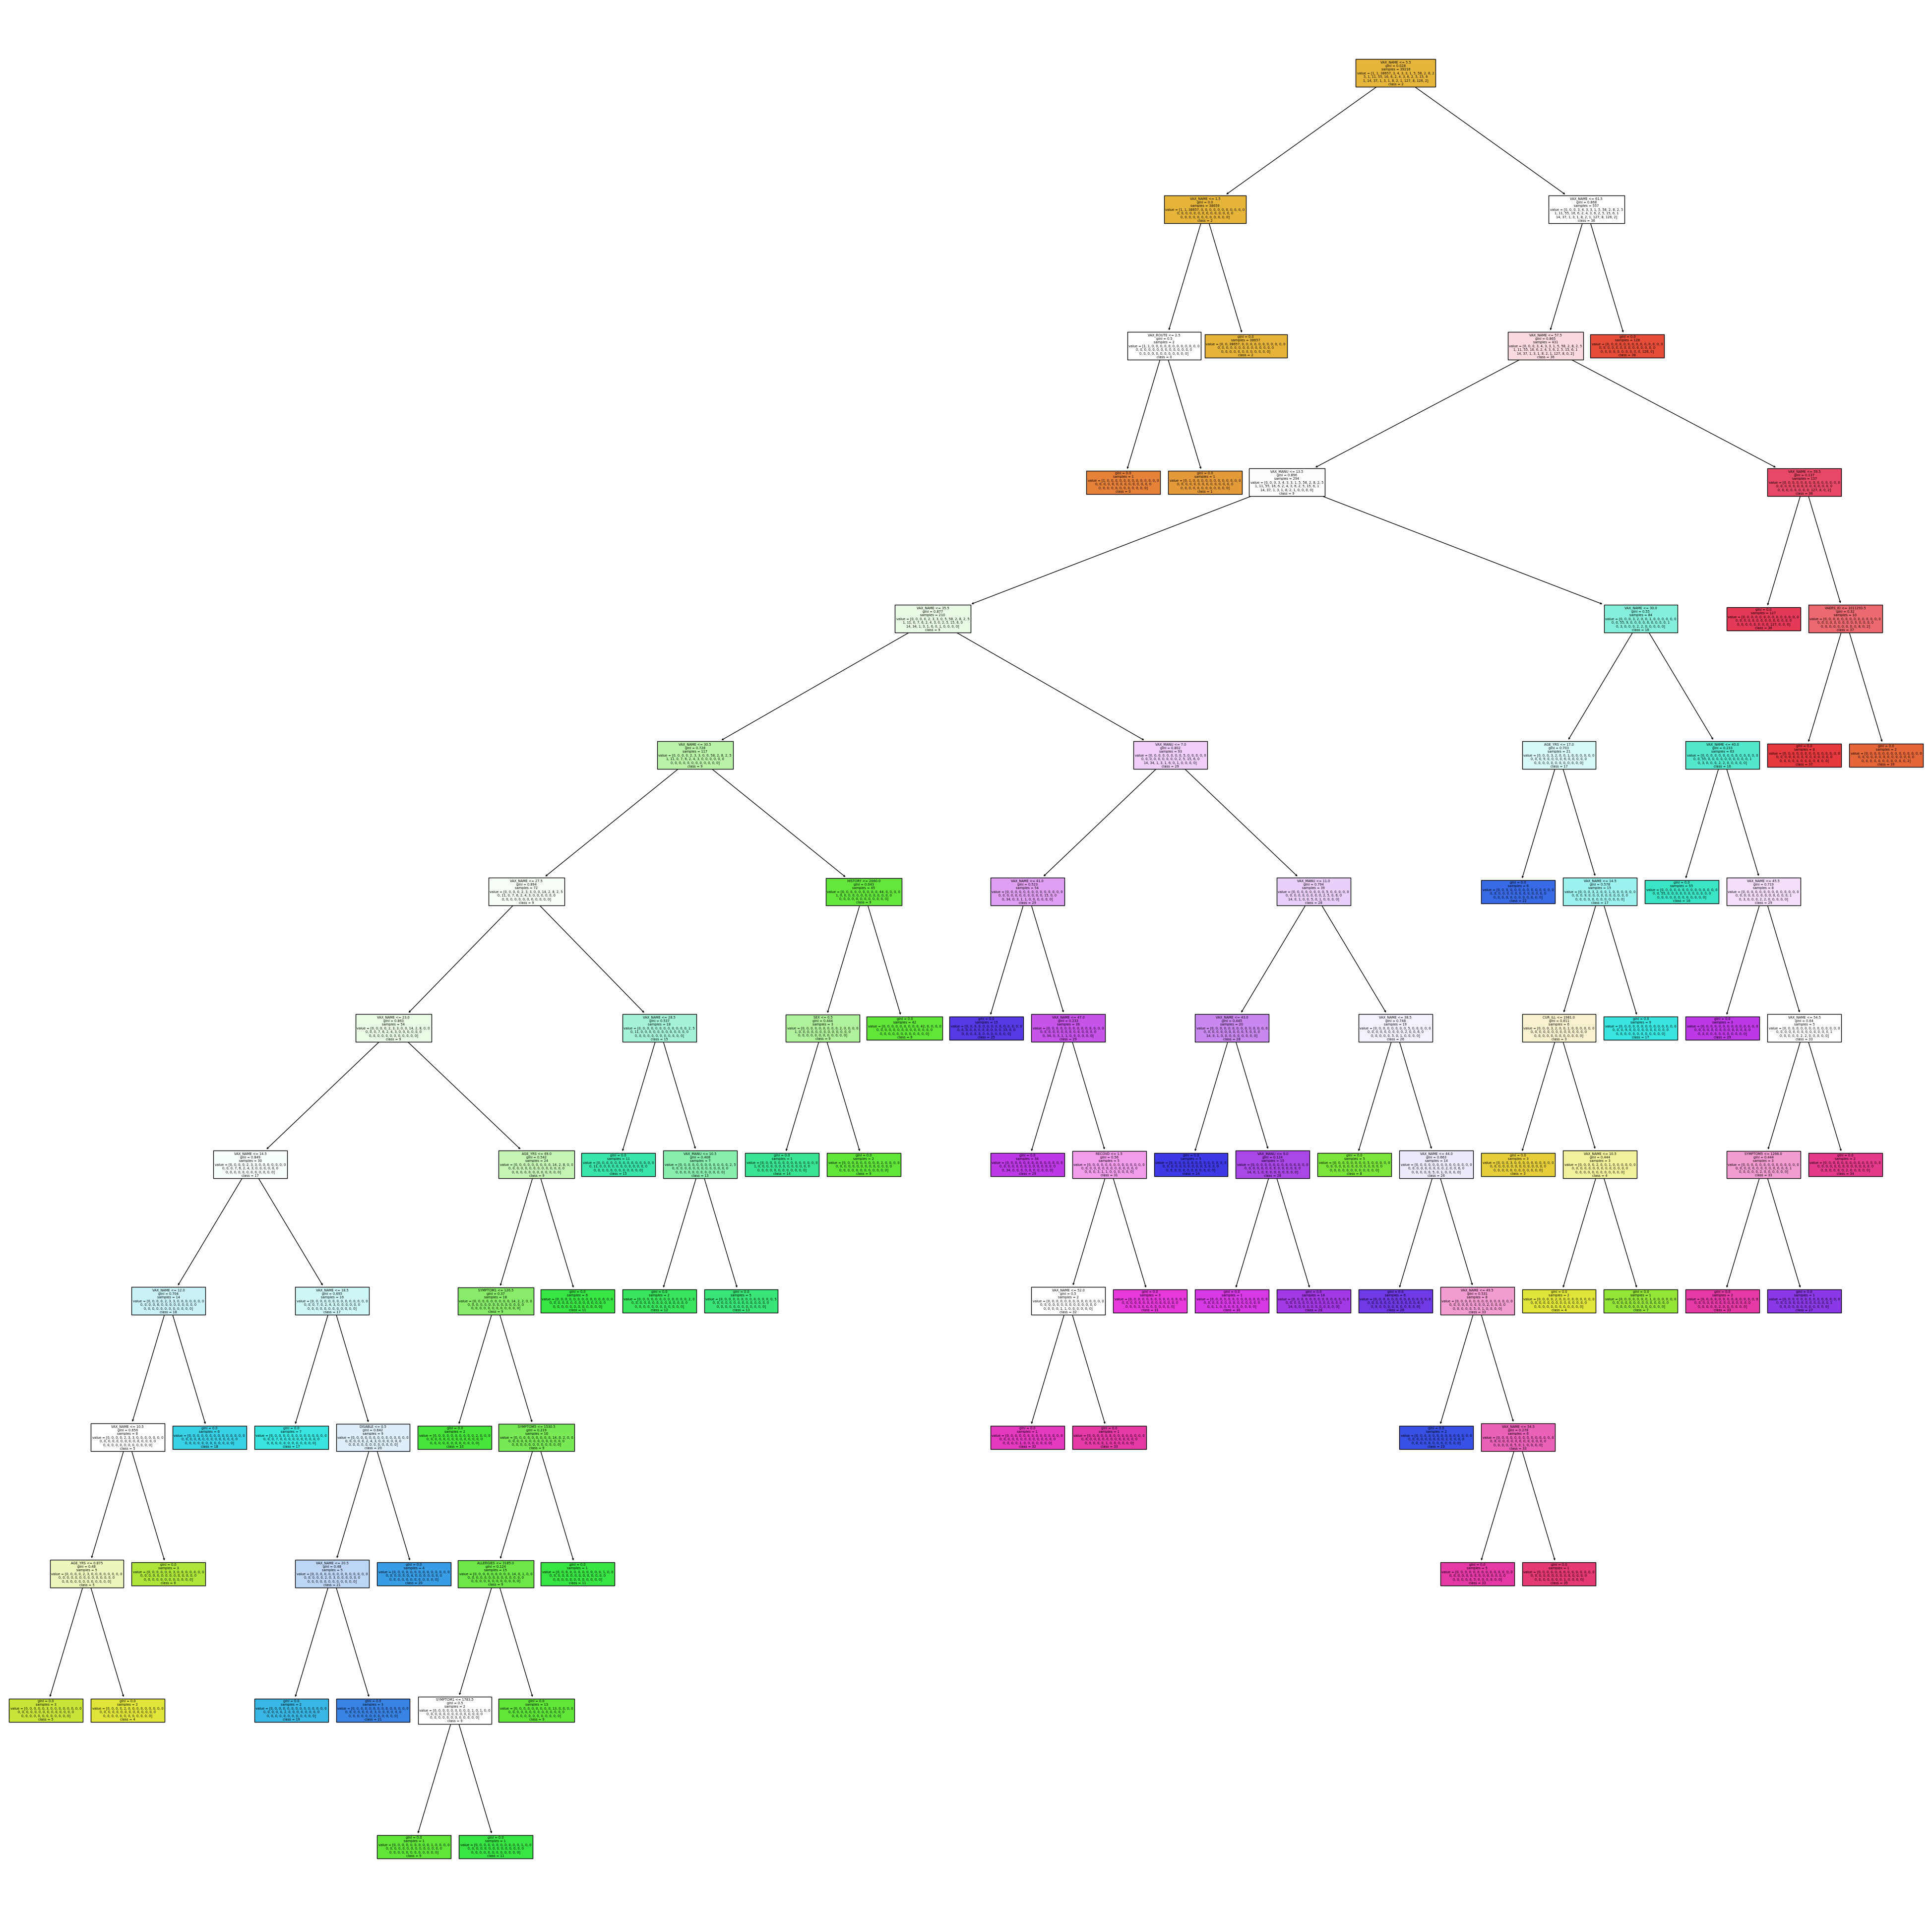

In [20]:
clf1 = DecisionTreeClassifier(random_state=0)
model1 = clf1.fit(X_train1, y_train1)
y_predt1=model1.predict(X_test1)
acc= round(accuracy_score(y_test1, y_predt1)*100, 3)
accuracy_list_dt.append(acc)
print("Accuracy: ",acc, "%")

# fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
fig1 = plt.figure(figsize=(50,50))
_ = tree.plot_tree(clf1, feature_names=X_train1.columns,  
                                class_names=['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31','32','33','34','35','36','37','38','39','40','41','42','43','44','45','46','47','48','49','50','51','52','53','54','55','56','57','58','59','60','61','62','63','64','65','66','67','68','69','70','71','72','73','74','75','76','77','78','79','80','81','82','83','84','85','86','87','88','89','90','91','92','93','94','95','96','97','98','99','100','101','102','103','104','105','106','107','108','109','110','111','112','113','114','115','116','117','118','119','120','121','122','123','124','125','126','127','128','129','130','131','132','133','134','135','136','137','138','139','140','141','142','143','144','145','146','147','148','149','150','151','152','153','154','155','156','157','158','159','160','161','162','163','164','165','166','167','168','169','170','171','172','173','174','175','176','177','178','179','180','181','182','183','184','185','186','187','188','189','190','191','192','193','194','195','196','197','198','199','200','201','202','203','204','205','206','207','208','209','210','211','212','213','214','215','216','217','218','219','220','221','222','223','224','225','226','227','228','229','230','231','232','233','234','235','236','237','238','239','240','241','242','243','244','245','246','247','248','249   '],
                                filled=True)

fig1.savefig("decision_trees/fivefold.png")

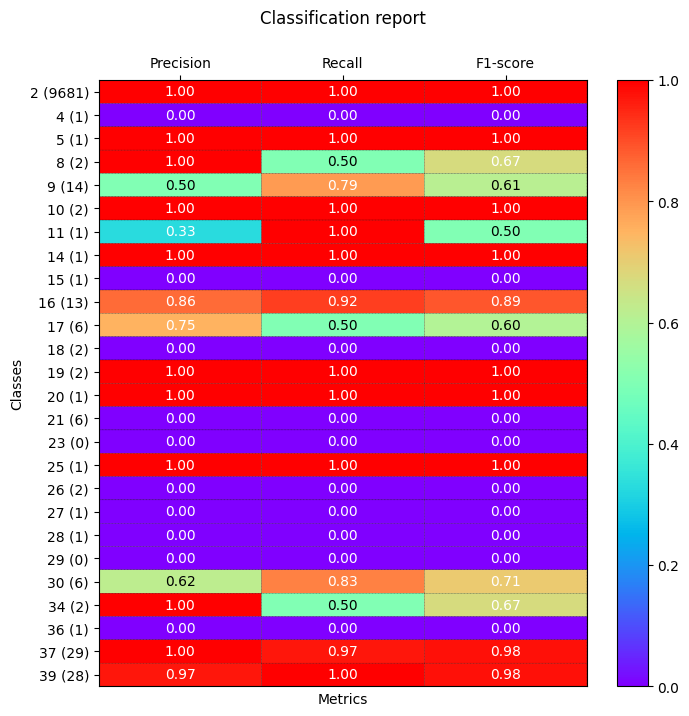

In [21]:
def show_values(pc, fmt="%.2f", **kw):
    '''
    Heatmap with text in each cell with matplotlib's pyplot
    Source: https://stackoverflow.com/a/25074150/395857 
    By HYRY
    '''
    pc.update_scalarmappable()
    ax = pc.axes
    #ax = pc.axes# FOR LATEST MATPLOTLIB
    #Use zip BELOW IN PYTHON 3
    for p, color, value in zip(pc.get_paths(), pc.get_facecolors(), pc.get_array()):
        x, y = p.vertices[:-2, :].mean(0)
        if np.all(color[:3] > 0.5):
            color = (0.0, 0.0, 0.0)
        else:
            color = (1.0, 1.0, 1.0)
        ax.text(x, y, fmt % value, ha="center", va="center", color=color, **kw)


def cm2inch(*tupl):
    '''
    Specify figure size in centimeter in matplotlib
    Source: https://stackoverflow.com/a/22787457/395857
    By gns-ank
    '''
    inch = 2.54
    if type(tupl[0]) == tuple:
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)


def heatmap(AUC, title, xlabel, ylabel, xticklabels, yticklabels, figure_width=40, figure_height=20, correct_orientation=False, cmap='RdBu'):
    '''
    Inspired by:
    - https://stackoverflow.com/a/16124677/395857 
    - https://stackoverflow.com/a/25074150/395857
    '''

    # Plot it out
    fig, ax = plt.subplots()    
    #c = ax.pcolor(AUC, edgecolors='k', linestyle= 'dashed', linewidths=0.2, cmap='RdBu', vmin=0.0, vmax=1.0)
    c = ax.pcolor(AUC, edgecolors='k', linestyle= 'dashed', linewidths=0.2, cmap=cmap)

    # put the major ticks at the middle of each cell
    ax.set_yticks(np.arange(AUC.shape[0]) + 0.5, minor=False)
    ax.set_xticks(np.arange(AUC.shape[1]) + 0.5, minor=False)

    # set tick labels
    #ax.set_xticklabels(np.arange(1,AUC.shape[1]+1), minor=False)
    ax.set_xticklabels(xticklabels, minor=False)
    ax.set_yticklabels(yticklabels, minor=False)

    # set title and x/y labels
    plt.title(title, y=1.08)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)      

    # Remove last blank column
    plt.xlim( (0, AUC.shape[1]) )

    # Turn off all the ticks
    ax = plt.gca()    
    for t in ax.xaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False
    for t in ax.yaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False


    # Add color bar
    plt.colorbar(c)

    # Add text in each cell 
    show_values(c)

    # Proper orientation (origin at the top left instead of bottom left)
    if correct_orientation:
        ax.invert_yaxis()
        ax.xaxis.tick_top()       

    # resize 
    fig = plt.gcf()
    fig.set_size_inches(cm2inch(20, 20))
    # fig.set_size_inches(cm2inch(40*4, 20*4))
    # fig.set_size_inches(cm2inch(figure_width, figure_height))



def plot_classification_report(classification_report, number_of_classes=2, title='Classification report ', cmap='RdYlGn'):
    '''
    Plot scikit-learn classification report.
    Extension based on https://stackoverflow.com/a/31689645/395857 
    '''
    lines = classification_report.split('\n')
    
    #drop initial lines
    lines = lines[2:]

    classes = []
    plotMat = []
    support = []
    class_names = []
    for line in lines[: number_of_classes]:
        t = list(filter(None, line.strip().split('  ')))
        if len(t) < 4: continue
        classes.append(t[0])
        v = [float(x) for x in t[1: len(t) - 1]]
        support.append(int(t[-1]))
        class_names.append(t[0])
        plotMat.append(v)


    xlabel = 'Metrics'
    ylabel = 'Classes'
    xticklabels = ['Precision', 'Recall', 'F1-score']
    yticklabels = ['{0} ({1})'.format(class_names[idx], sup) for idx, sup  in enumerate(support)]
    figure_width = 10
    figure_height = len(class_names) + 3
    correct_orientation = True
    heatmap(np.array(plotMat), title, xlabel, ylabel, xticklabels, yticklabels, figure_width, figure_height, correct_orientation, cmap=cmap)
    plt.show()

    
        

def main():
    sampleClassificationReport1= """             precision    recall  f1-score   support

           2       1.00      1.00      1.00      9681
           4       0.00      0.00      0.00         1
           5       1.00      1.00      1.00         1
           8       1.00      0.50      0.67         2
           9       0.50      0.79      0.61        14
          10       1.00      1.00      1.00         2
          11       0.33      1.00      0.50         1
          14       1.00      1.00      1.00         1
          15       0.00      0.00      0.00         1
          16       0.86      0.92      0.89        13
          17       0.75      0.50      0.60         6
          18       0.00      0.00      0.00         2
          19       1.00      1.00      1.00         2
          20       1.00      1.00      1.00         1
          21       0.00      0.00      0.00         6
          23       0.00      0.00      0.00         0
          25       1.00      1.00      1.00         1
          26       0.00      0.00      0.00         2
          27       0.00      0.00      0.00         1
          28       0.00      0.00      0.00         1
          29       0.00      0.00      0.00         0
          30       0.62      0.83      0.71         6
          34       1.00      0.50      0.67         2
          36       0.00      0.00      0.00         1
          37       1.00      0.97      0.98        29
          39       0.97      1.00      0.98        28   """

    plot_classification_report(sampleClassificationReport1,number_of_classes=26,title='Classification report', cmap='rainbow')

    plt.savefig('classification_report/five.png', dpi=200, format='png', bbox_inches='tight')
    plt.close()


main()
    # cProfile.run('main()') # if you want to do some profiling


## 6th Fold

In [22]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size = 0.16, random_state = 0)

# X_train.isnull().sum()

# Fitting Random Forest Classification to the Training set
classifier4 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier4.fit(X_train2, y_train2)

# Predicting the Test set results
y_pred4 = classifier4.predict(X_test2)

# Print Accuracy Score
acc= round(accuracy_score(y_test2, y_pred4)*100, 3)
accuracy_list.append(acc)
print("Accuracy: ",acc, "%")

# Print classification report
print(classification_report(y_test2, y_pred4))

Accuracy:  99.732 %
              precision    recall  f1-score   support

           2       1.00      1.00      1.00      7748
           4       0.00      0.00      0.00         1
           5       1.00      1.00      1.00         1
           8       0.00      0.00      0.00         1
           9       0.57      0.67      0.62        12
          10       1.00      1.00      1.00         2
          11       0.33      1.00      0.50         1
          15       0.00      0.00      0.00         1
          16       0.80      0.89      0.84         9
          17       1.00      0.50      0.67         6
          18       1.00      1.00      1.00         1
          19       0.50      0.50      0.50         2
          20       1.00      1.00      1.00         1
          21       0.00      0.00      0.00         5
          23       0.00      0.00      0.00         0
          26       0.00      0.00      0.00         2
          30       0.80      0.80      0.80         5
       

c:\Users\sneha\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\sneha\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\sneha\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

Accuracy:  99.924 %


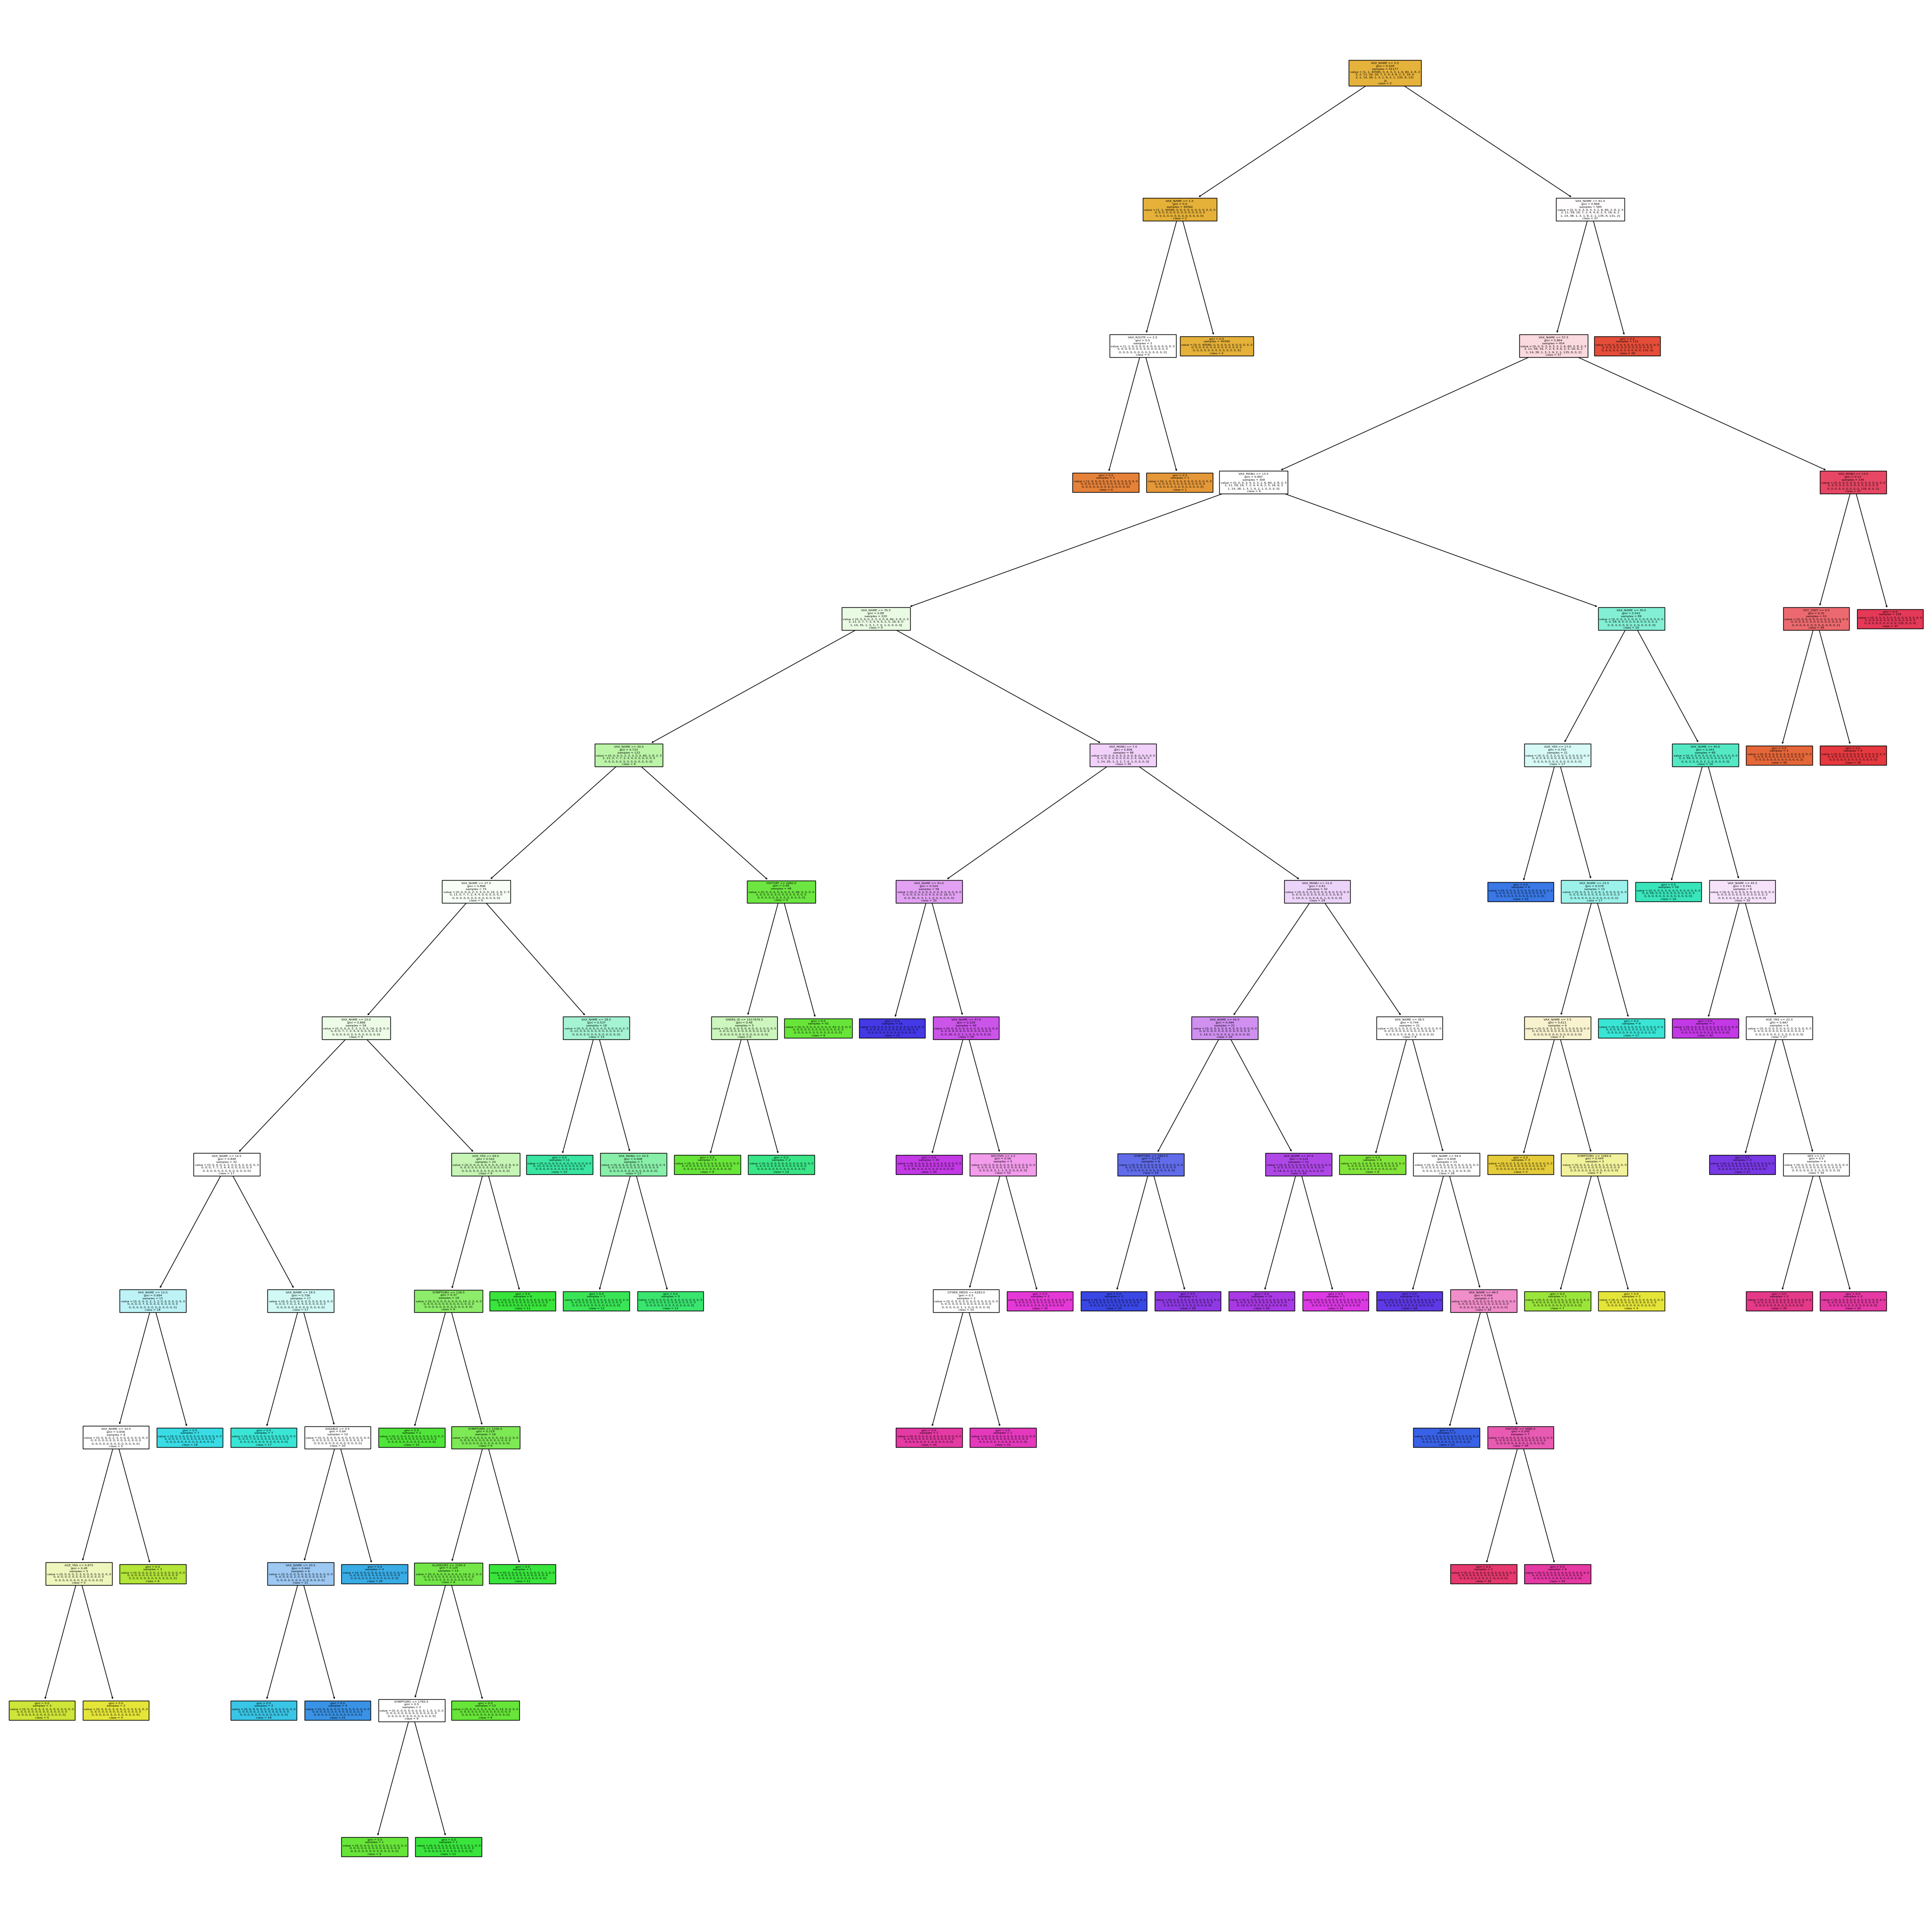

In [23]:
clf2 = DecisionTreeClassifier(random_state=0)
model2 = clf2.fit(X_train2, y_train2)
y_predt2=model2.predict(X_test2)
acc= round(accuracy_score(y_test2, y_predt2)*100, 3)
accuracy_list_dt.append(acc)
print("Accuracy: ",acc, "%")

# fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
fig2 = plt.figure(figsize=(50,50))
_ = tree.plot_tree(clf2, feature_names=X_train2.columns,  
                                class_names=['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31','32','33','34','35','36','37','38','39','40','41','42','43','44','45','46','47','48','49','50','51','52','53','54','55','56','57','58','59','60','61','62','63','64','65','66','67','68','69','70','71','72','73','74','75','76','77','78','79','80','81','82','83','84','85','86','87','88','89','90','91','92','93','94','95','96','97','98','99','100','101','102','103','104','105','106','107','108','109','110','111','112','113','114','115','116','117','118','119','120','121','122','123','124','125','126','127','128','129','130','131','132','133','134','135','136','137','138','139','140','141','142','143','144','145','146','147','148','149','150','151','152','153','154','155','156','157','158','159','160','161','162','163','164','165','166','167','168','169','170','171','172','173','174','175','176','177','178','179','180','181','182','183','184','185','186','187','188','189','190','191','192','193','194','195','196','197','198','199','200','201','202','203','204','205','206','207','208','209','210','211','212','213','214','215','216','217','218','219','220','221','222','223','224','225','226','227','228','229','230','231','232','233','234','235','236','237','238','239','240','241','242','243','244','245','246','247','248','249   '],
                                filled=True)

fig2.savefig("decision_trees/sixfold.png")

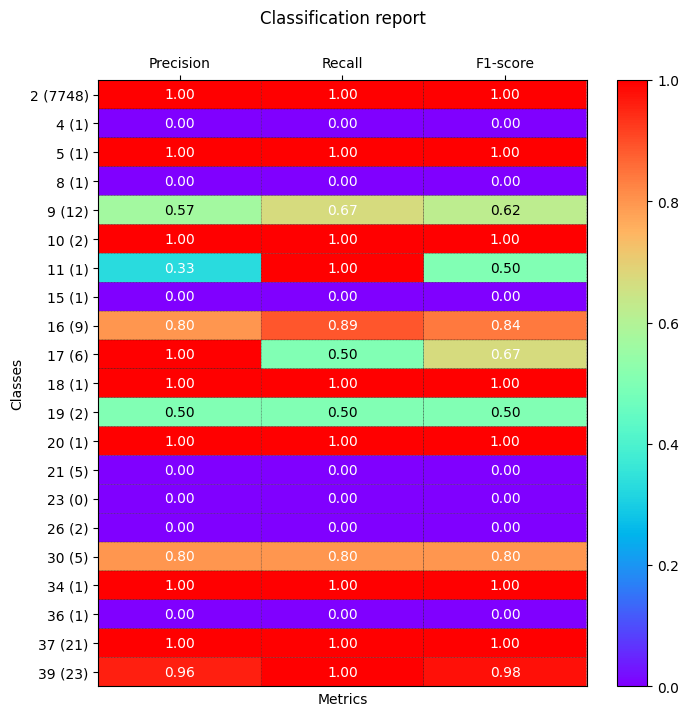

In [24]:
def main():
    sampleClassificationReport4= """              precision    recall  f1-score   support

           2       1.00      1.00      1.00      7748
           4       0.00      0.00      0.00         1
           5       1.00      1.00      1.00         1
           8       0.00      0.00      0.00         1
           9       0.57      0.67      0.62        12
          10       1.00      1.00      1.00         2
          11       0.33      1.00      0.50         1
          15       0.00      0.00      0.00         1
          16       0.80      0.89      0.84         9
          17       1.00      0.50      0.67         6
          18       1.00      1.00      1.00         1
          19       0.50      0.50      0.50         2
          20       1.00      1.00      1.00         1
          21       0.00      0.00      0.00         5
          23       0.00      0.00      0.00         0
          26       0.00      0.00      0.00         2
          30       0.80      0.80      0.80         5
          34       1.00      1.00      1.00         1
          36       0.00      0.00      0.00         1
          37       1.00      1.00      1.00        21
          39       0.96      1.00      0.98        23
      """
    
    plot_classification_report(sampleClassificationReport4,number_of_classes=26,title='Classification report', cmap='rainbow')
    plt.savefig('classification_report/six.png', dpi=200, format='png', bbox_inches='tight')
    plt.close()

main()

## 7th FOLD

In [25]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size = 0.14, random_state = 0)


# Fitting Random Forest Classification to the Training set
classifier7 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier7.fit(X_train3, y_train3)

# Predicting the Test set results
y_pred7 = classifier7.predict(X_test3)

# Print Accuracy Score
acc= round(accuracy_score(y_test3, y_pred7)*100, 3)
accuracy_list.append(acc)
print("Accuracy: ",acc, "%")

# Print classification report
print(classification_report(y_test3, y_pred7))


Accuracy:  99.825 %
              precision    recall  f1-score   support

           2       1.00      1.00      1.00      6784
           4       0.00      0.00      0.00         0
           5       0.50      1.00      0.67         1
           8       0.00      0.00      0.00         1
           9       0.88      1.00      0.93         7
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         1
          15       0.00      0.00      0.00         1
          16       0.80      1.00      0.89         8
          17       1.00      0.50      0.67         6
          18       1.00      1.00      1.00         1
          19       1.00      0.50      0.67         2
          21       0.75      1.00      0.86         3
          26       0.00      0.00      0.00         2
          30       0.67      0.67      0.67         3
          36       0.00      0.00      0.00         1
          37       0.90      0.95      0.92        19
       

c:\Users\sneha\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\sneha\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\sneha\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

Accuracy:  99.927 %


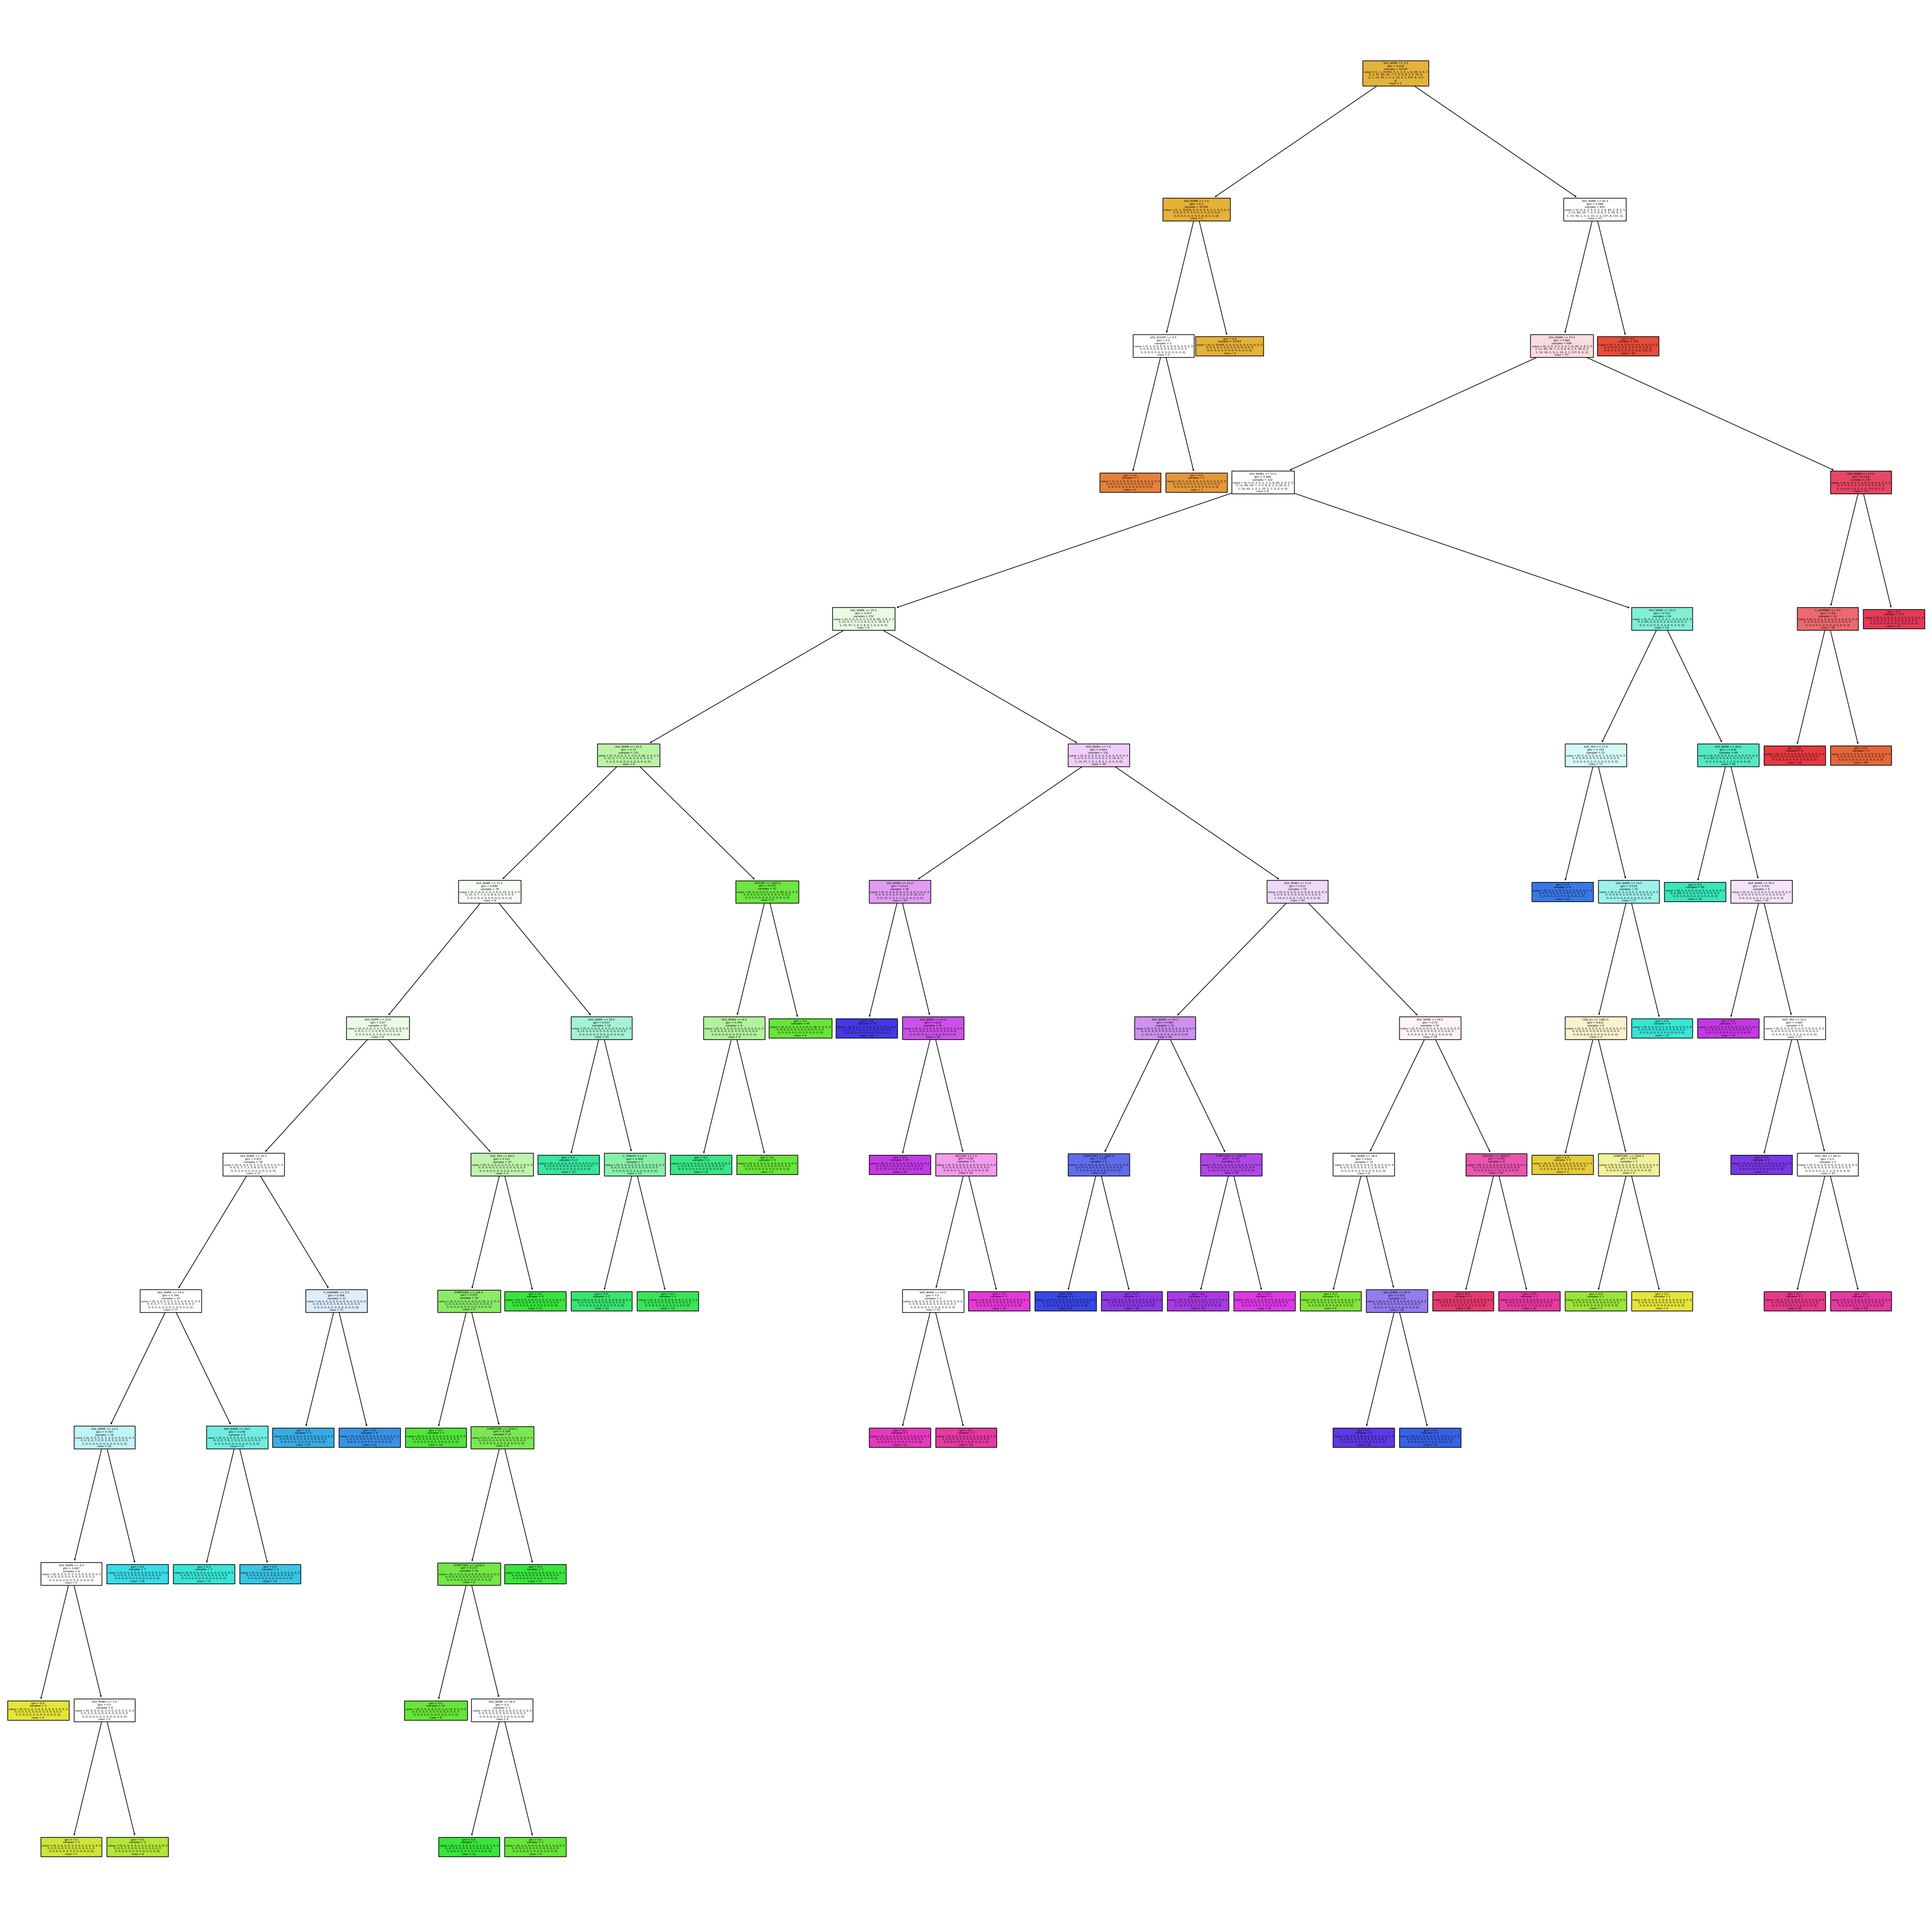

In [26]:
clf3 = DecisionTreeClassifier(random_state=0)
model3 = clf3.fit(X_train3, y_train3)
y_predt3=model3.predict(X_test3)
acc= round(accuracy_score(y_test3, y_predt3)*100, 3)
accuracy_list_dt.append(acc)
print("Accuracy: ",acc, "%")

# fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
fig3 = plt.figure(figsize=(50,50))
_ = tree.plot_tree(clf3, feature_names=X_train3.columns,  
                                class_names=['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31','32','33','34','35','36','37','38','39','40','41','42','43','44','45','46','47','48','49','50','51','52','53','54','55','56','57','58','59','60','61','62','63','64','65','66','67','68','69','70','71','72','73','74','75','76','77','78','79','80','81','82','83','84','85','86','87','88','89','90','91','92','93','94','95','96','97','98','99','100','101','102','103','104','105','106','107','108','109','110','111','112','113','114','115','116','117','118','119','120','121','122','123','124','125','126','127','128','129','130','131','132','133','134','135','136','137','138','139','140','141','142','143','144','145','146','147','148','149','150','151','152','153','154','155','156','157','158','159','160','161','162','163','164','165','166','167','168','169','170','171','172','173','174','175','176','177','178','179','180','181','182','183','184','185','186','187','188','189','190','191','192','193','194','195','196','197','198','199','200','201','202','203','204','205','206','207','208','209','210','211','212','213','214','215','216','217','218','219','220','221','222','223','224','225','226','227','228','229','230','231','232','233','234','235','236','237','238','239','240','241','242','243','244','245','246','247','248','249   '],
                                filled=True)

fig3.savefig("decision_trees/sevenfold.png")

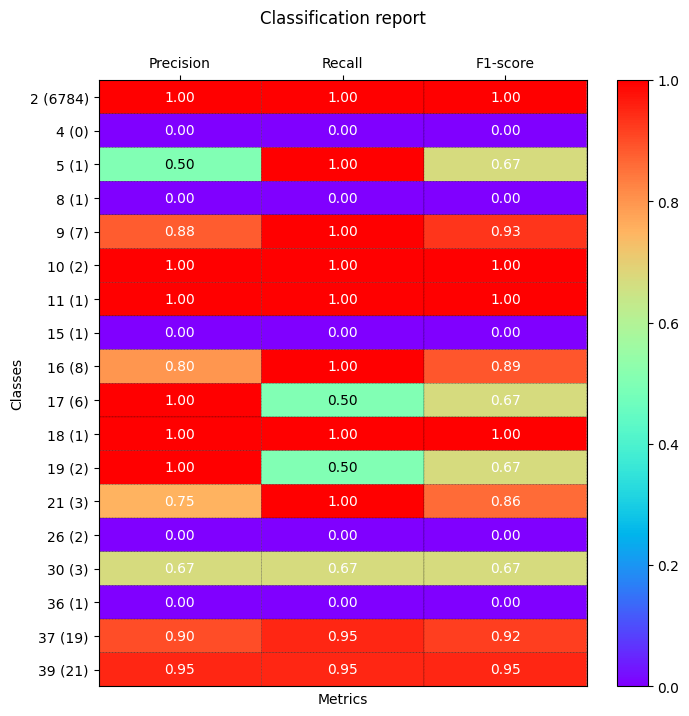

In [27]:
def main():
    sampleClassificationReport7= """              precision    recall  f1-score   support

           2       1.00      1.00      1.00      6784
           4       0.00      0.00      0.00         0
           5       0.50      1.00      0.67         1
           8       0.00      0.00      0.00         1
           9       0.88      1.00      0.93         7
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         1
          15       0.00      0.00      0.00         1
          16       0.80      1.00      0.89         8
          17       1.00      0.50      0.67         6
          18       1.00      1.00      1.00         1
          19       1.00      0.50      0.67         2
          21       0.75      1.00      0.86         3
          26       0.00      0.00      0.00         2
          30       0.67      0.67      0.67         3
          36       0.00      0.00      0.00         1
          37       0.90      0.95      0.92        19
          39       0.95      0.95      0.95        21

      """
    
    plot_classification_report(sampleClassificationReport7,number_of_classes=26,title='Classification report', cmap='rainbow')
    plt.savefig('classification_report/seven.png', dpi=200, format='png', bbox_inches='tight')
    plt.close()

main()

## 8th Fold

In [28]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(X, y, test_size = 0.125, random_state = 0)


# Fitting Random Forest Classification to the Training set
classifier11 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier11.fit(X_train4, y_train4)

# Predicting the Test set results
y_pred11 = classifier11.predict(X_test4)

# Print Accuracy Score
acc= round(accuracy_score(y_test4, y_pred11)*100, 3)
accuracy_list.append(acc)
print("Accuracy: ",acc, "%")

# Print classification report
print(classification_report(y_test4, y_pred11))


Accuracy:  99.804 %
              precision    recall  f1-score   support

           2       1.00      1.00      1.00      6058
           5       0.50      1.00      0.67         1
           8       0.00      0.00      0.00         1
           9       0.67      0.86      0.75         7
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         1
          13       0.00      0.00      0.00         0
          16       0.78      1.00      0.88         7
          17       1.00      0.50      0.67         4
          18       1.00      1.00      1.00         1
          19       0.00      0.00      0.00         1
          21       0.00      0.00      0.00         2
          26       0.00      0.00      0.00         2
          30       0.67      0.67      0.67         3
          36       0.00      0.00      0.00         1
          37       0.94      1.00      0.97        17
          39       1.00      0.95      0.97        20

    ac

c:\Users\sneha\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\sneha\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\sneha\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

Accuracy:  99.918 %


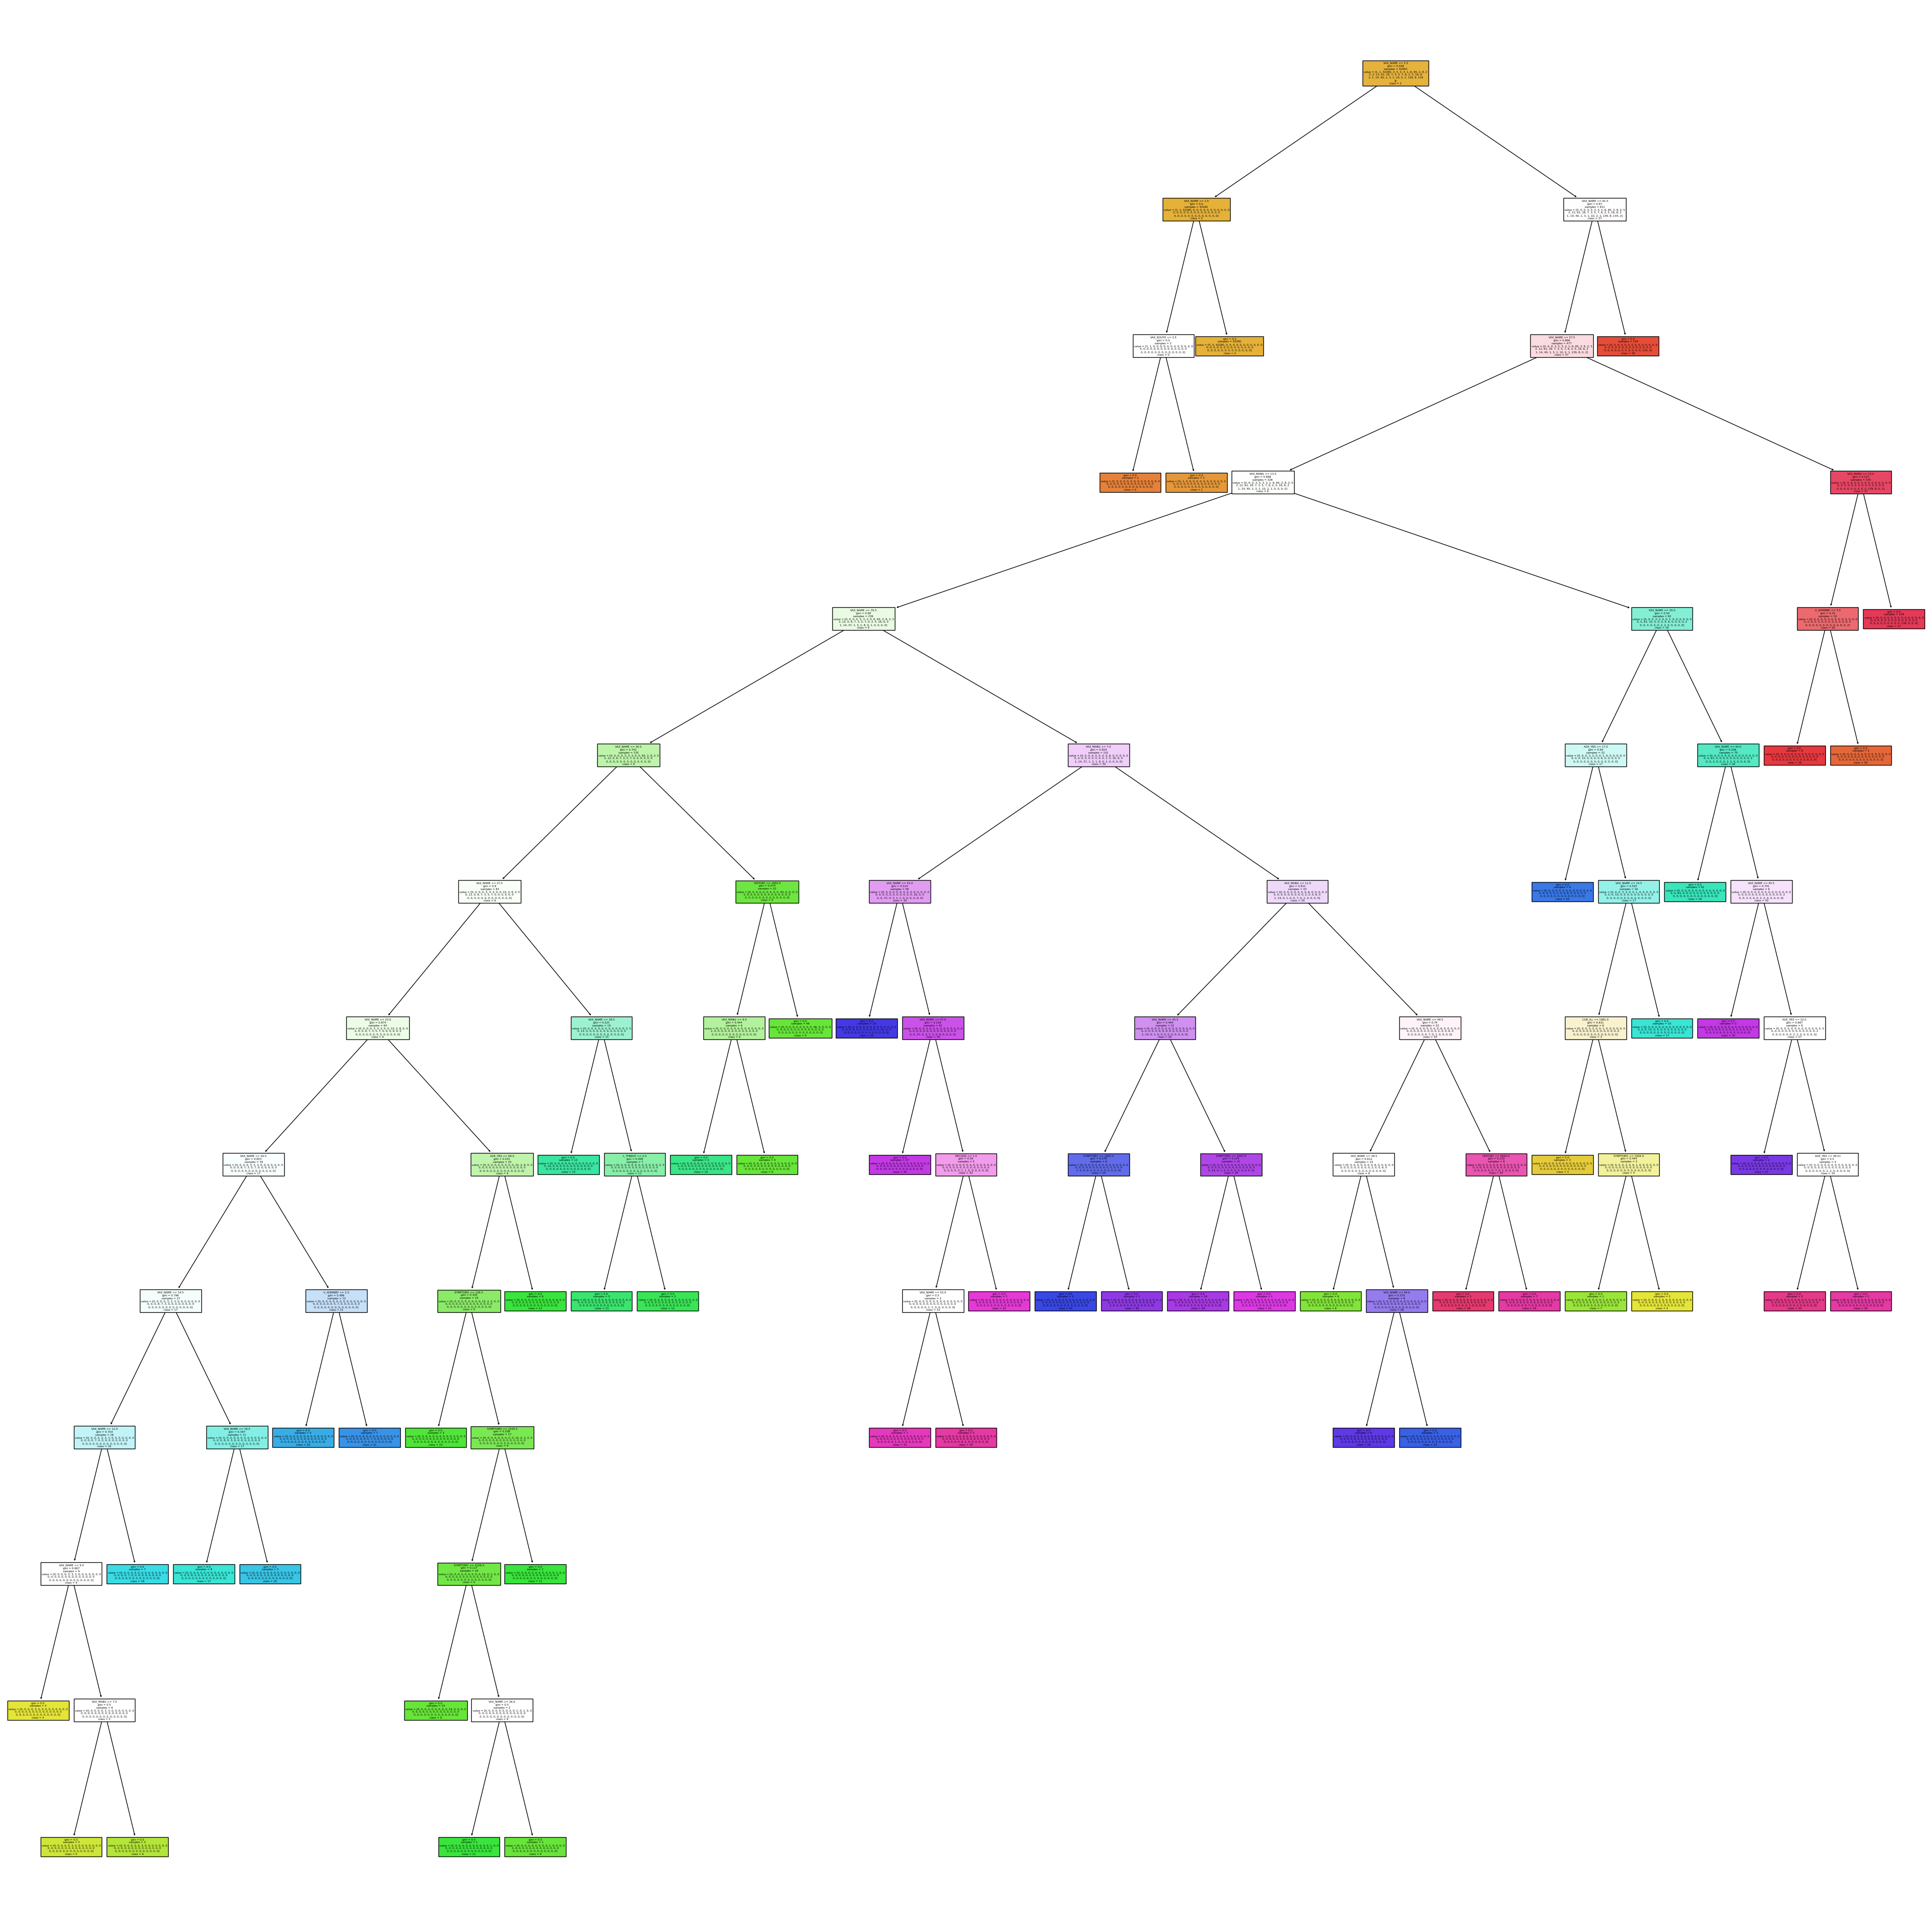

In [29]:
clf4 = DecisionTreeClassifier(random_state=0)
model4 = clf4.fit(X_train4, y_train4)
y_predt4=model4.predict(X_test4)
acc= round(accuracy_score(y_test4, y_predt4)*100, 3)
accuracy_list_dt.append(acc)
print("Accuracy: ",acc, "%")
# fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
fig4 = plt.figure(figsize=(50,50))
_ = tree.plot_tree(clf4, feature_names=X_train4.columns,  
                                class_names=['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31','32','33','34','35','36','37','38','39','40','41','42','43','44','45','46','47','48','49','50','51','52','53','54','55','56','57','58','59','60','61','62','63','64','65','66','67','68','69','70','71','72','73','74','75','76','77','78','79','80','81','82','83','84','85','86','87','88','89','90','91','92','93','94','95','96','97','98','99','100','101','102','103','104','105','106','107','108','109','110','111','112','113','114','115','116','117','118','119','120','121','122','123','124','125','126','127','128','129','130','131','132','133','134','135','136','137','138','139','140','141','142','143','144','145','146','147','148','149','150','151','152','153','154','155','156','157','158','159','160','161','162','163','164','165','166','167','168','169','170','171','172','173','174','175','176','177','178','179','180','181','182','183','184','185','186','187','188','189','190','191','192','193','194','195','196','197','198','199','200','201','202','203','204','205','206','207','208','209','210','211','212','213','214','215','216','217','218','219','220','221','222','223','224','225','226','227','228','229','230','231','232','233','234','235','236','237','238','239','240','241','242','243','244','245','246','247','248','249   '],
                                filled=True)

fig4.savefig("decision_trees/eightfold.png")

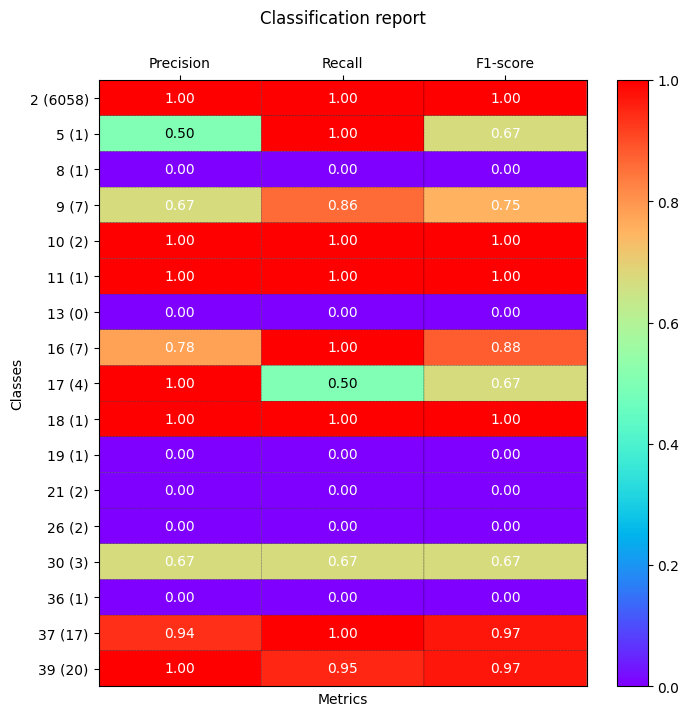

In [30]:
def main():
    sampleClassificationReport8= """              precision    recall  f1-score   support

           2       1.00      1.00      1.00      6058
           5       0.50      1.00      0.67         1
           8       0.00      0.00      0.00         1
           9       0.67      0.86      0.75         7
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         1
          13       0.00      0.00      0.00         0
          16       0.78      1.00      0.88         7
          17       1.00      0.50      0.67         4
          18       1.00      1.00      1.00         1
          19       0.00      0.00      0.00         1
          21       0.00      0.00      0.00         2
          26       0.00      0.00      0.00         2
          30       0.67      0.67      0.67         3
          36       0.00      0.00      0.00         1
          37       0.94      1.00      0.97        17
          39       1.00      0.95      0.97        20

      """
    
    plot_classification_report(sampleClassificationReport8,number_of_classes=26,title='Classification report', cmap='rainbow')
    plt.savefig('classification_report/eight.png', dpi=200, format='png', bbox_inches='tight')
    plt.close()

main()

## 10th FOLD

In [31]:
# Fitting Random Forest Classification to the Training set
X_train5, X_test5, y_train5, y_test5 = train_test_split(X, y, test_size = 0.1, random_state = 0)
classifier14 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier14.fit(X_train5, y_train5)

# Predicting the Test set results
y_pred14 = classifier14.predict(X_test5)

# Print Accuracy Score
acc= round(accuracy_score(y_test5, y_pred14)*100, 3)
accuracy_list.append(acc)
print("Accuracy: ",acc, "%")

# Print classification report
print(classification_report(y_test5, y_pred14))

Accuracy:  99.796 %
              precision    recall  f1-score   support

           2       1.00      1.00      1.00      4852
           4       0.00      0.00      0.00         0
           5       1.00      1.00      1.00         1
           8       0.00      0.00      0.00         1
           9       0.62      1.00      0.77         5
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          16       1.00      1.00      1.00         6
          17       1.00      0.33      0.50         3
          18       1.00      1.00      1.00         1
          19       0.00      0.00      0.00         1
          21       0.00      0.00      0.00         2
          26       0.00      0.00      0.00         2
          30       0.67      1.00      0.80         2
          36       0.00      0.00      0.00         1
          37       0.93      1.00      0.97        14
          39       1.00      0.90      0.95        10

    ac

c:\Users\sneha\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\sneha\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\sneha\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

Accuracy:  99.918 %


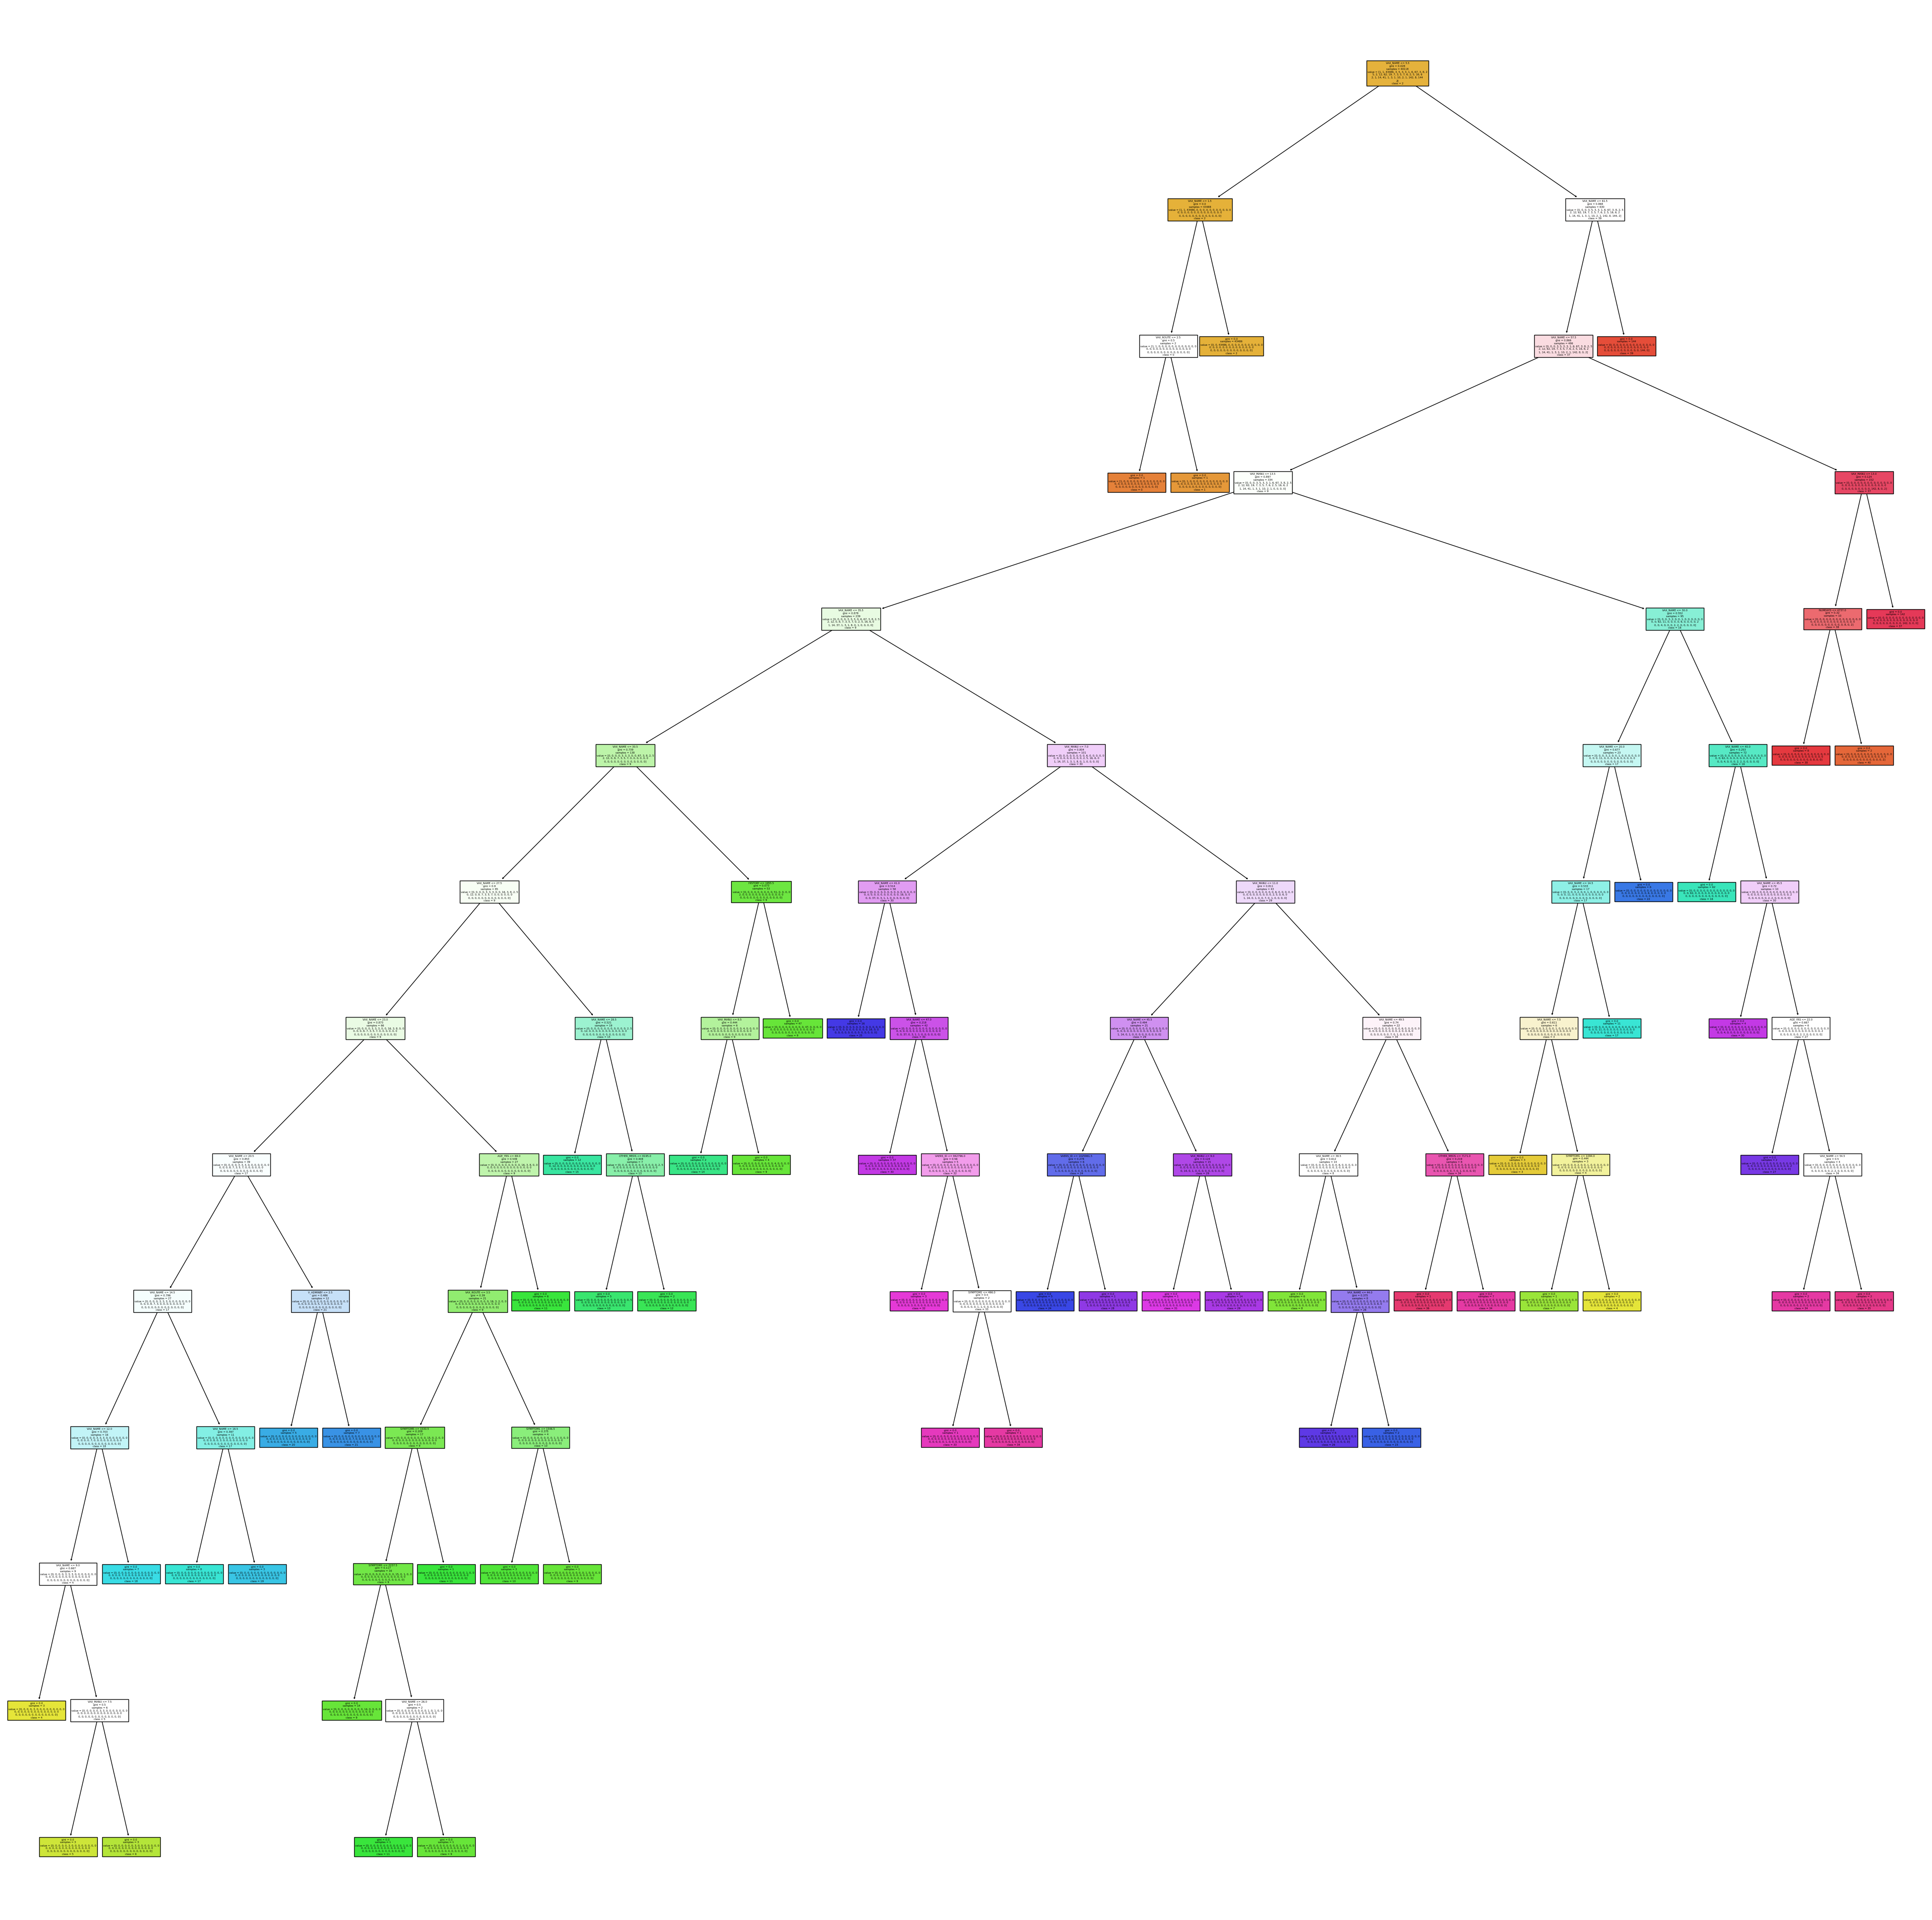

In [32]:
clf5 = DecisionTreeClassifier(random_state=0)
model5 = clf5.fit(X_train5, y_train5)
y_predt5=model5.predict(X_test5)
acc= round(accuracy_score(y_test5, y_predt5)*100, 3)
accuracy_list_dt.append(acc)
print("Accuracy: ",acc, "%")

# fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
fig5 = plt.figure(figsize=(50,50))
_ = tree.plot_tree(clf5, feature_names=X_train5.columns,  
                                class_names=['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31','32','33','34','35','36','37','38','39','40','41','42','43','44','45','46','47','48','49','50','51','52','53','54','55','56','57','58','59','60','61','62','63','64','65','66','67','68','69','70','71','72','73','74','75','76','77','78','79','80','81','82','83','84','85','86','87','88','89','90','91','92','93','94','95','96','97','98','99','100','101','102','103','104','105','106','107','108','109','110','111','112','113','114','115','116','117','118','119','120','121','122','123','124','125','126','127','128','129','130','131','132','133','134','135','136','137','138','139','140','141','142','143','144','145','146','147','148','149','150','151','152','153','154','155','156','157','158','159','160','161','162','163','164','165','166','167','168','169','170','171','172','173','174','175','176','177','178','179','180','181','182','183','184','185','186','187','188','189','190','191','192','193','194','195','196','197','198','199','200','201','202','203','204','205','206','207','208','209','210','211','212','213','214','215','216','217','218','219','220','221','222','223','224','225','226','227','228','229','230','231','232','233','234','235','236','237','238','239','240','241','242','243','244','245','246','247','248','249   '],
                                filled=True)

fig5.savefig("decision_trees/tenfold.png")

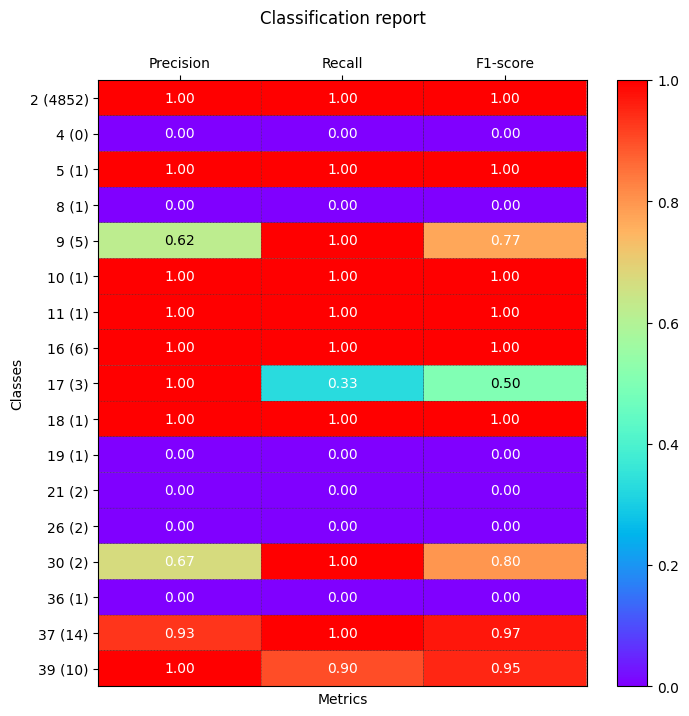

In [33]:
def main():
    sampleClassificationReport10= """              precision    recall  f1-score   support

           2       1.00      1.00      1.00      4852
           4       0.00      0.00      0.00         0
           5       1.00      1.00      1.00         1
           8       0.00      0.00      0.00         1
           9       0.62      1.00      0.77         5
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          16       1.00      1.00      1.00         6
          17       1.00      0.33      0.50         3
          18       1.00      1.00      1.00         1
          19       0.00      0.00      0.00         1
          21       0.00      0.00      0.00         2
          26       0.00      0.00      0.00         2
          30       0.67      1.00      0.80         2
          36       0.00      0.00      0.00         1
          37       0.93      1.00      0.97        14
          39       1.00      0.90      0.95        10

      """
    
    plot_classification_report(sampleClassificationReport10,number_of_classes=26,title='Classification report', cmap='rainbow')
    plt.savefig('classification_report/ten.png', dpi=200, format='png', bbox_inches='tight')
    plt.close()

main()

# Metrics

1. feature 23 (0.543287)
2. feature 21 (0.171129)
3. feature 1 (0.055433)
4. feature 8 (0.035792)
5. feature 0 (0.030833)
6. feature 22 (0.028822)
7. feature 9 (0.025532)
8. feature 12 (0.015832)
9. feature 11 (0.013665)
10. feature 2 (0.009744)
11. feature 16 (0.008792)
12. feature 17 (0.007965)
13. feature 10 (0.007739)
14. feature 18 (0.006899)
15. feature 15 (0.006020)
16. feature 19 (0.005103)
17. feature 13 (0.004567)
18. feature 7 (0.004231)
19. feature 6 (0.004206)
20. feature 14 (0.003859)
21. feature 20 (0.003600)
22. feature 5 (0.003522)
23. feature 3 (0.002159)
24. feature 4 (0.001268)


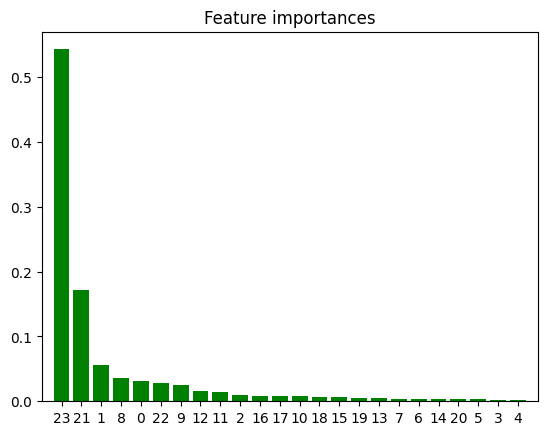

In [34]:
# # Fitting Random Forest Classification to the Training set
# classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
# classifier.fit(X_train3, y_train3)

# # Predicting the Test set results
# y_pred = classifier.predict(X_test3)

# # Print feature importance
importances = classifier.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns
for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest as a bar chart
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], color="g", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

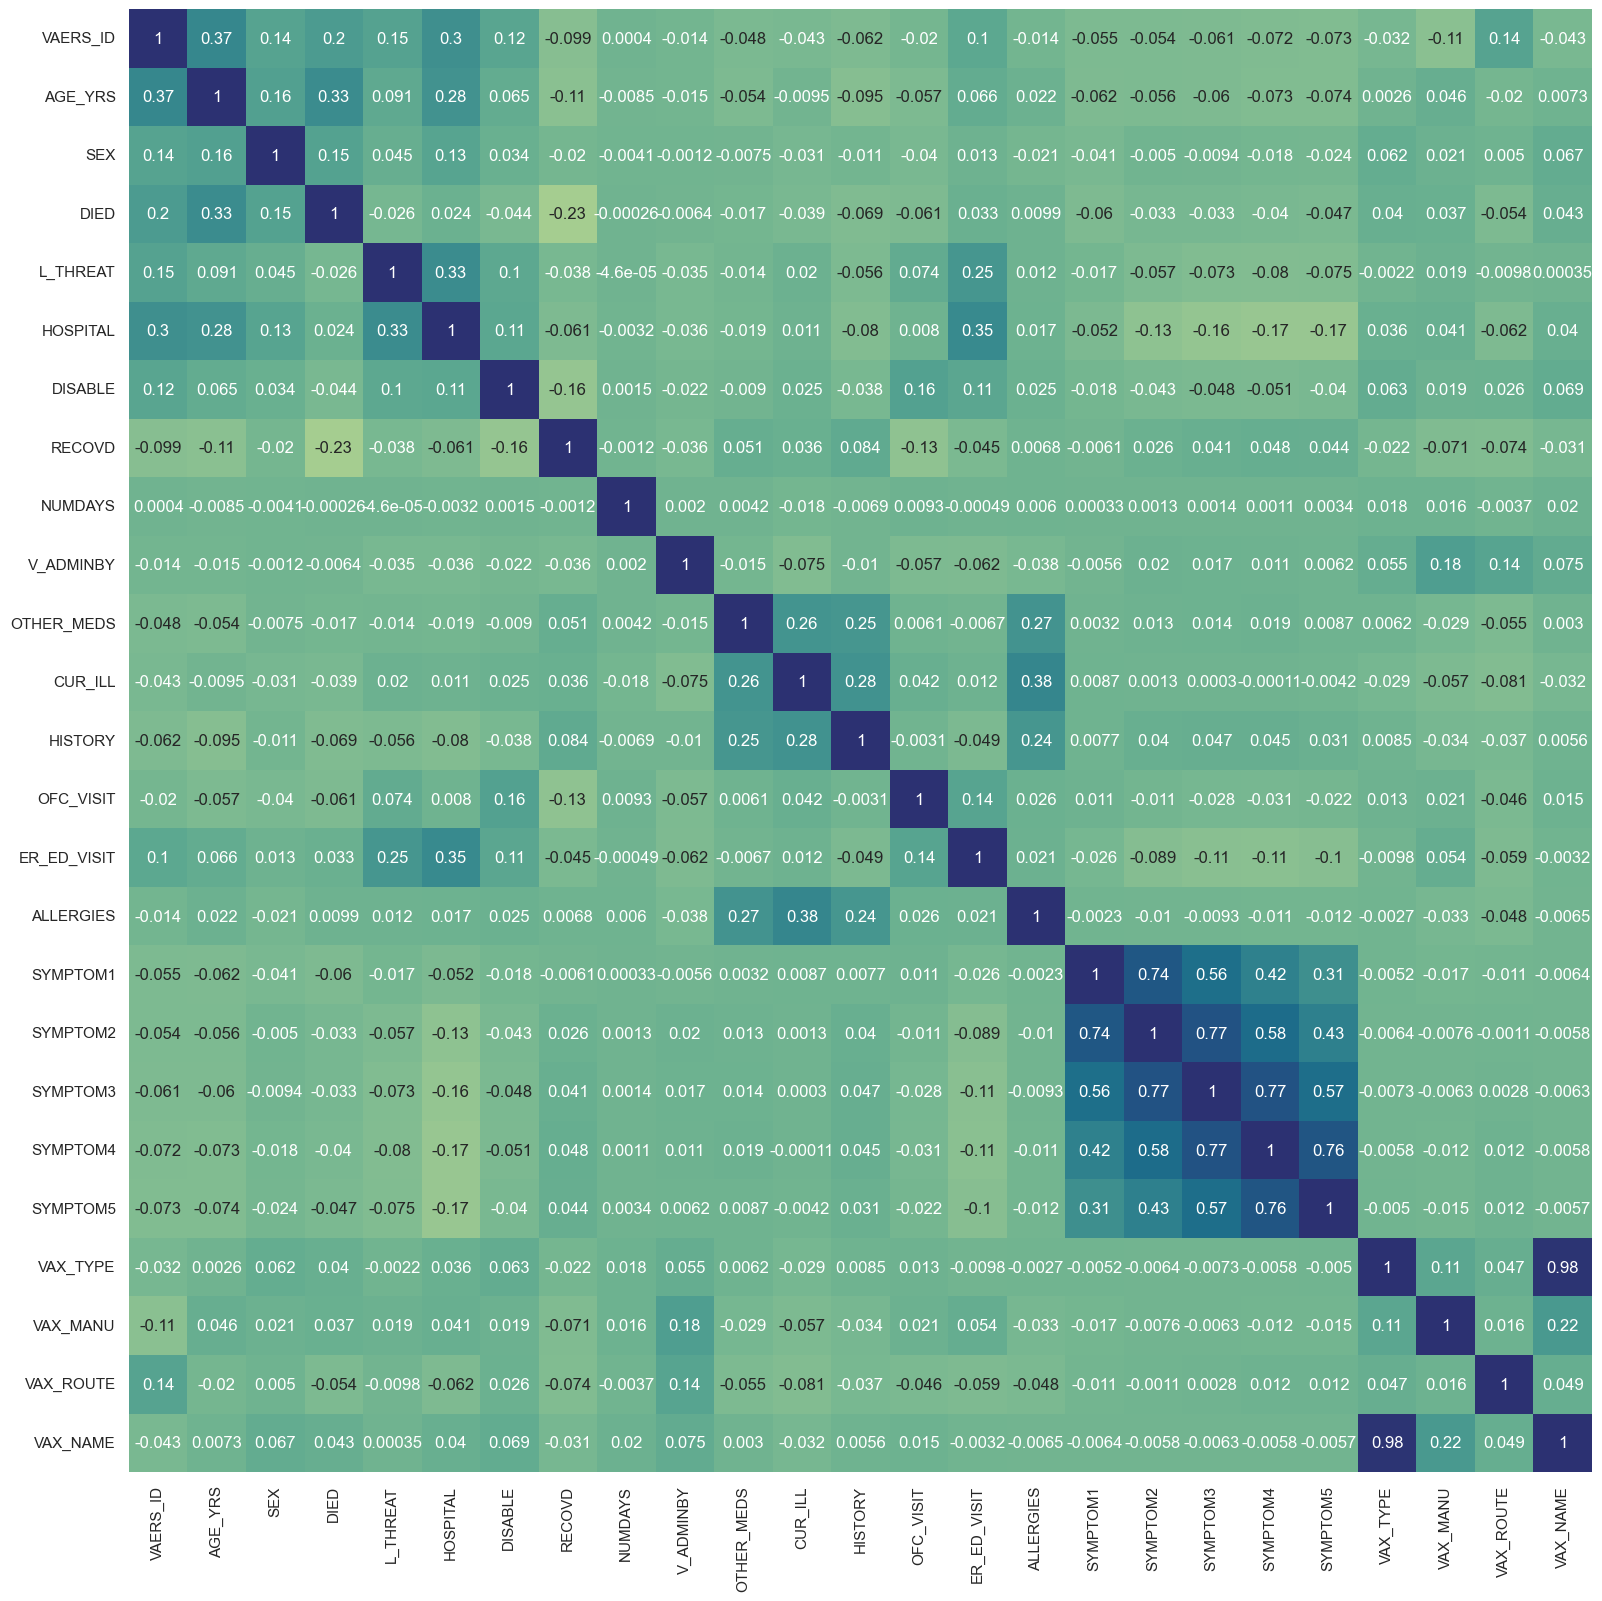

In [42]:
#plot the heatmap
plt.figure(figsize=(19,19))
sns.heatmap(df.corr(), annot=True, cmap="crest", square=True, cbar=False)
#save the heatmap
plt.savefig('graphs/heatmap.png', dpi=200, format='png', bbox_inches='tight')
plt.show()

In [36]:
accuracy_list

[99.735, 99.732, 99.825, 99.804, 99.796]

In [37]:
#make a dataframe of accuracy list and k values
k_list=[5,6,7,8,10]
df1 = pd.DataFrame({'K-Value': k_list, 'Accuracy': accuracy_list})
print(df1)
print()

df2 = pd.DataFrame({'K-Value': k_list, 'Accuracy': accuracy_list_dt})
print(df2)


   K-Value  Accuracy
0        5    99.735
1        6    99.732
2        7    99.825
3        8    99.804
4       10    99.796

   K-Value  Accuracy
0        5    99.918
1        6    99.924
2        7    99.927
3        8    99.918
4       10    99.918


C:\Users\sneha\AppData\Local\Temp\ipykernel_3592\3727156184.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=df1, x='K-Value', y='Accuracy', palette="crest", linewidth=2.5, label='Random Forest', marker='^')
C:\Users\sneha\AppData\Local\Temp\ipykernel_3592\3727156184.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=df2, x='K-Value', y='Accuracy', palette="crest", linewidth=2.5, label='Decision Tree', marker='o')


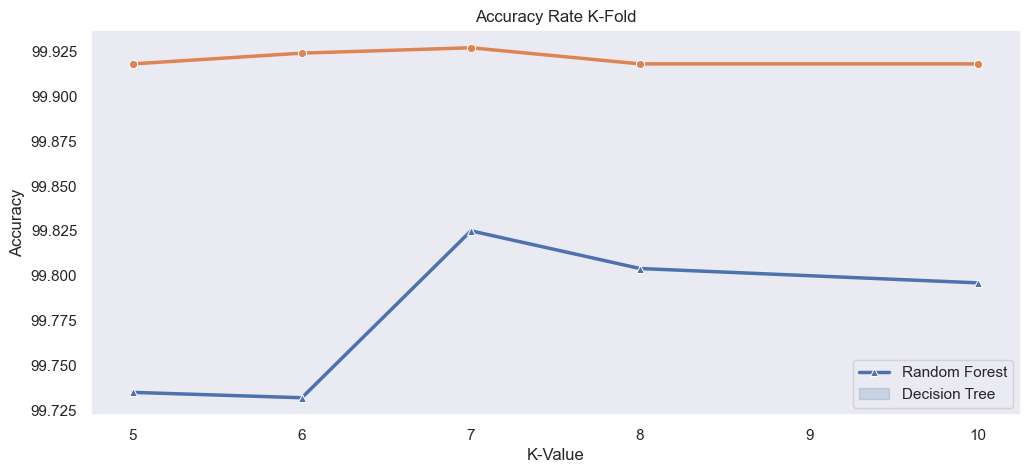

In [40]:
#plot random forest and decision tree accuracy rate using seaborn line chart

plt.figure(figsize=(12,5))
sns.lineplot(data=df1, x='K-Value', y='Accuracy', palette="crest", linewidth=2.5, label='Random Forest', marker='^')
sns.lineplot(data=df2, x='K-Value', y='Accuracy', palette="crest", linewidth=2.5, label='Decision Tree', marker='o')
sns.set(style='dark',rc={'figure.figsize':(10,10)})
plt.title('Accuracy Rate K-Fold')
plt.legend(['Random Forest', 'Decision Tree'])
plt.savefig('graphs/accuracy.png', dpi=200, format='png', bbox_inches='tight')
plt.show()



In [39]:
#make a table of two columns accuracy and k values
df1 = pd.DataFrame({'K-Value': k_list, 'Accuracy': accuracy_list})
# df1
#average of accuracy list
average = sum(accuracy_list)/len(accuracy_list)
average

99.7784